# Deep Learning Models with Keras
---



**Objective:** In this notebook exercise, you will learn how to build Artficial Neural Networks for deep learning models using the Keras library integrated in TensorFlow as of version 2.0. Keras is a minimalist Python library which made building DL models simple and straightforward.

We will be exploring how to build and train a neural network model using both of the Keras Sequential and Functional APIs.


## Defining a Sequential model

The first exercise for this colab is building an artificial neural network using the Keras sequential model.
The library we need is `tensorflow.keras.models`



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4, input_dim = 2, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

# print model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Reminder: `Dense` refers to a fully connected layer (meaning all the neurons of a layers are connected to all the neurons in the following layer).

This how the ReLU function looks like:

![alt text](https://qph.fs.quoracdn.net/main-qimg-9e3b87e175577fe97da51fd1a2b50eac)

*source:* https://qph.fs.quoracdn.net/main-qimg-9e3b87e175577fe97da51fd1a2b50eac

And this is the sigmoid function which squashes values to the interval [0;1]:

![alt text](https://qph.fs.quoracdn.net/main-qimg-6b67bea3311c3429bfb34b6b1737fe0c)

*source:* https://qph.fs.quoracdn.net/main-qimg-6b67bea3311c3429bfb34b6b1737fe0c

## Visualizing the model

Using plot_model, Keras allows us to visually portray the artificial network we have built with input layer, hidden layers and an output layer.

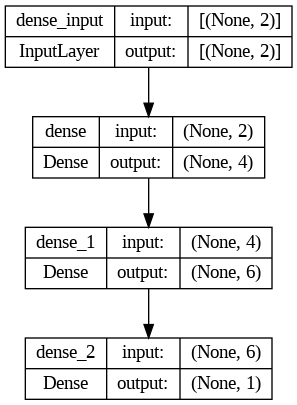

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Functional API
Unlike the sequential model, the functional model allows for complex interactions between layers. As you'll notice, in this model, we create the input layer apart and then link all the layers to one another using brackets ( ) at the end of the definition.

We will need two extra libraries on before:
* `tensorflow.keras.utils`
* `tensorflow.keras.layers`

We will also be using plot_model to visualize this functional API model.



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551 (2.15 KB)
Trainable params: 551 (2.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


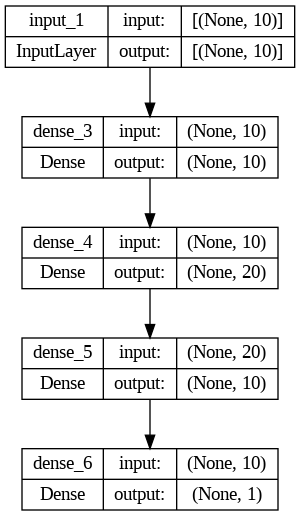

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

# define input
visible = Input(shape=(10,))

# connect layers
layer1 = Dense(10, activation='relu')(visible)
layer2 = Dense(20, activation='relu')(layer1)
layer3 = Dense(10, activation='relu')(layer2)
layer4 = Dense(1, activation='sigmoid')(layer3)

# finally, we create the model
model = Model(inputs=visible, outputs=layer4)

# summarize layers
model.summary()

# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png',  show_shapes=True, show_layer_names=True)

## Model training

In this code cell, the steps for building, compiling and training the model are described.
1. First build the neural network with activation functions
2. Compile the model by choosing an optimization algorithm (stochastic gradient descent for this example) and a loss (cost) function to optimize. Since the output neuron is singular with a sigmoid activation function, we will use binary_crossentropy.
3. We generated random data just for the sake of describing the way to train an ANN (artificial neural network)
4. Train the model using the `fit()` function choosing batch size and epochs.
5. Use the trained model to predict on new unseen data.

Since this is a random data set, the predicted output is not very meaningful but the purpose is to show the ***compile*** and ***train*** steps when developping a Deep Learning Model.

In [ ]:
# build model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer='sgd',
              loss='binary_crossentropy', # categorical crossentry, MSE = 0.5(y-y_hat)^2
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((100000, 100))
labels = np.random.randint(2, size=(100000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

# predict
data_example = np.random.random((1, 100))
model.predict(data_example)

Epoch 1/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.6978 - accuracy: 0.4983
Epoch 2/10
3125/3125 [==============================] - 6s 2ms/step - loss: 0.6941 - accuracy: 0.5008
Epoch 3/10
3125/3125 [==============================] - 6s 2ms/step - loss: 0.6935 - accuracy: 0.5023
Epoch 4/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.6934 - accuracy: 0.5015
Epoch 5/10
3125/3125 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5030
Epoch 6/10
3125/3125 [==============================] - 6s 2ms/step - loss: 0.6932 - accuracy: 0.5043
Epoch 7/10
3125/3125 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5039
Epoch 8/10
3125/3125 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5044
Epoch 9/10
3125/3125 [==============================] - 7s 2ms/step - loss: 0.6931 - accuracy: 0.5040
Epoch 10/10
1/1 [==============================] - 0s 143ms/step


array([[0.5093699]], dtype=float32)

# Custom model

Let's build this model using both Sequential & Functional APIs. This exercise will help you apply everything we went through in this notebook. Good luck!
![alt text](https://miro.medium.com/max/1400/1*3fA77_mLNiJTSgZFhYnU0Q@2x.png)

In [ ]:
# Sequential

model = Sequential()
model.add(Dense(4, activation="relu", input_dim=3))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 16        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Functional API

input_layer = Input(shape=3)
hidden1 = Dense(4, activation="relu")(input_layer)
hidden2 = Dense(4, activation="relu")(hidden1)
output_layer = Dense(1, activation="sigmoid")(hidden2)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 16        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
